## IMPORTS

In [69]:
import csv, sys
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

## Reading the data from the CSVs into separate dataframes

In [3]:
details_2016 = pd.read_csv('/Users/sonalichaudhari/Desktop/ADS_MidTerm/Data/properties_2016.csv',low_memory=False)
details_2017 = pd.read_csv('/Users/sonalichaudhari/Desktop/ADS_MidTerm/Data/properties_2017.csv',low_memory=False)

trans_2016 = pd.read_csv('/Users/sonalichaudhari/Desktop/ADS_MidTerm/Data/train_2016_v2.csv',low_memory=False)
trans_2017 = pd.read_csv('/Users/sonalichaudhari/Desktop/ADS_MidTerm/Data/train_2017.csv',low_memory=False)

In [1]:
print("2016 Rows and Columns-",details_2016.shape)
print("2017 Rows and Columns-",details_2017.shape)

NameError: name 'details_2016' is not defined

### Separating the year and month from the transactiondate column and storing them in new columns

In [25]:
trans_2016['transactiondate'] = pd.to_datetime(trans_2016['transactiondate'])
trans_2016['year'] = trans_2016['transactiondate'].dt.year
trans_2016['month'] = trans_2016['transactiondate'].dt.month

trans_2017['transactiondate'] = pd.to_datetime(trans_2017['transactiondate'])
trans_2017['year'] = trans_2017['transactiondate'].dt.year
trans_2017['month'] = trans_2017['transactiondate'].dt.month

## Counting the missing data each column and storing it another dataframe ->missing_data

In [33]:
# Taking the sum of null rows for each column and storing it in new dataframe -> missig_data
missing_data = details_2016.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data_17 = details_2017.isnull().sum().to_frame(name='Missing_Count').reset_index()

# Caluclating the % of the missing data for each column
missing_data['Missing_percent'] = (missing_data['Missing_Count']/details_2016.shape[0])*100
missing_data_17['Missing_percent'] = (missing_data_17['Missing_Count']/details_2016.shape[0])*100

#missing_data.head()

In [31]:
# Sorting the the columns by missing %
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)

### Plotting the missing values Graph

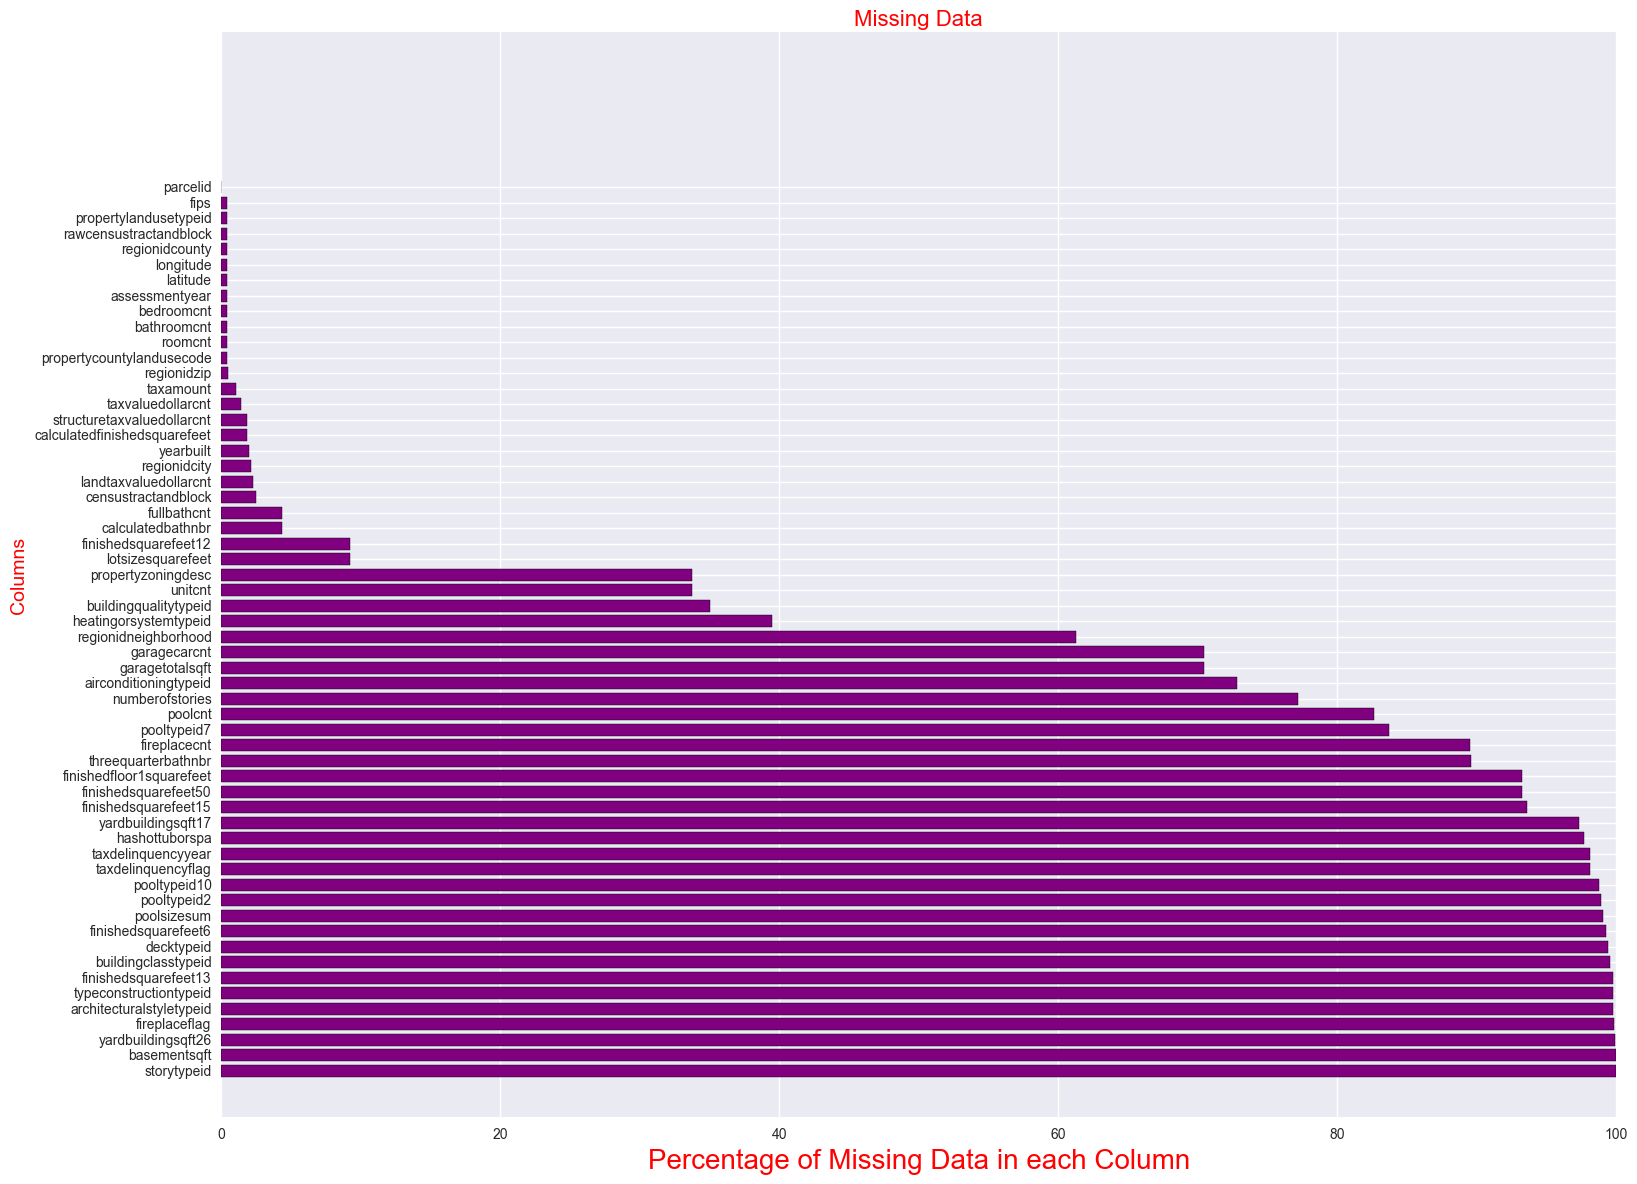

In [32]:
fig, ax = plt.subplots(figsize=(18,14))
ax.barh(range(details_2016.shape[1]), missing_data.Missing_percent.values, align='center',color='Purple')

ax.set_yticks(range(details_2016.shape[1]))
ax.set_yticklabels(missing_data['index'].values,rotation =0,linespacing =20, fontsize =10)
ax.invert_yaxis()  

ax.set_xlabel('Percentage of Missing Data in each Column',fontsize=20, color='red')
ax.set_ylabel('Columns',fontsize=14, color='red')
ax.set_title('Missing Data',fontsize=16, color='red')

plt.show()

### Considering only the columns having more than 70% of data

In [86]:
features_16 = missing_data['index'][(missing_data.Missing_percent <30)]
features_17 = missing_data_17['index'][(missing_data_17.Missing_percent <30)]

# Including on the features in the merge data
properties_2016 = details_2016[features_16]
properties_2017 = details_2017[features_17]

### Merging the properties and transaction data

In [87]:
data_2016 = pd.merge(trans_2016,properties_2016,on='parcelid', how='left')
data_2017 = pd.merge(trans_2017,properties_2017,on='parcelid', how='left')

In [88]:
print("2016 Rows and Columns-",data_2016.shape)
print("2017 Rows and Columns-",data_2017.shape)

2016 Rows and Columns- (90275, 29)
2017 Rows and Columns- (77613, 29)


## Log error = Log(Zestimate) - Log(Saleprice)

#### Distribution of Log error

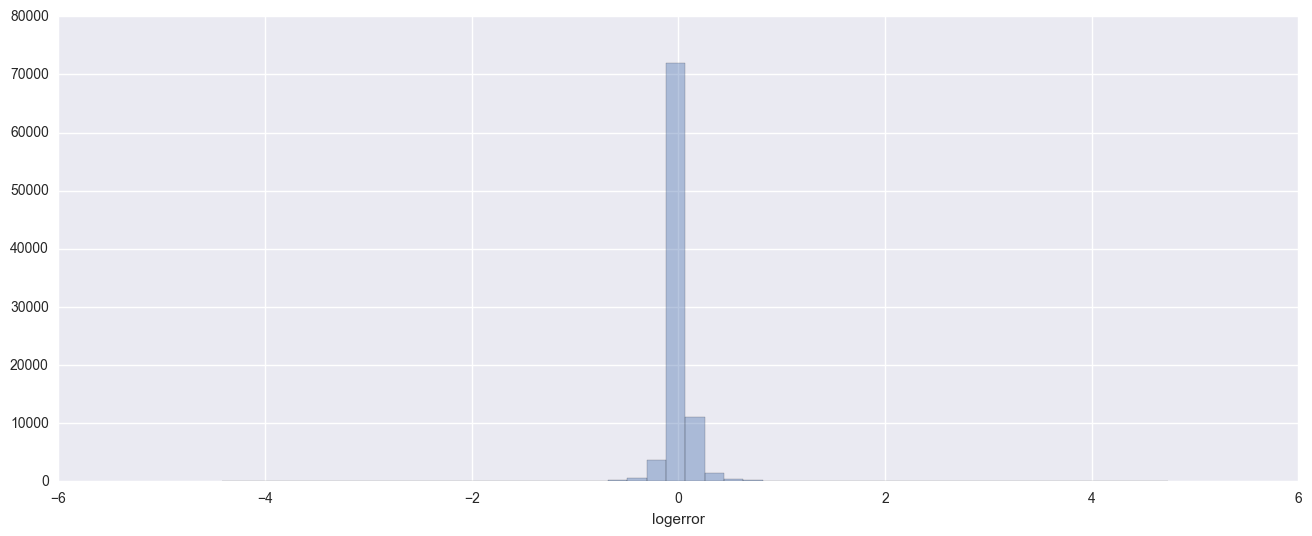

In [21]:
plt.figure(figsize=(16,6))
sns.distplot(trans_2016.logerror, bins=50, kde=False);
plt.show()

#### Distribition of Absolute log error

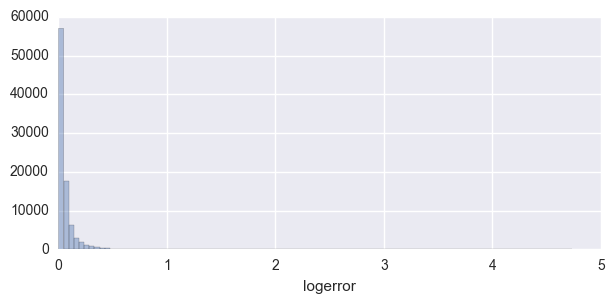

In [23]:
plt.figure(figsize=(7,3))
sns.distplot(abs(trans_2016.logerror), bins=100, kde=False);
plt.show()

## CORRELATION GRAPH (Heat Map) BETWEEN COLUMNS

In [74]:
# # Finding the correlation between the features

# f, ax = plt.subplots(figsize=(10, 8))
# corr = merge_2016.corr()

# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(330, 0, as_cmap=True),
#             square=True, linewidths=.5,vmax=0.3,ax=ax, cbar_kws={"shrink": 1})

# plt.show()

In [ ]:
# # Let us just impute the missing values with mean values to compute correlation coefficients #
# mean_values = mergeddf.mean(axis=0)
# mergeddf2016 = mergeddf.fillna(mean_values, inplace=True)

# # Now let us look at the correlation coefficient of each of these variables #
# x_cols = [col for col in mergeddf2016.columns if col not in ['logerror'] if mergeddf2016[col].dtype=='float64']

# labels = []
# values = []
# for col in x_cols:
#     labels.append(col)
#     values.append(np.corrcoef(mergeddf2016[col].values, mergeddf2016.logerror.values)[0,1])
# corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
# corr_df = corr_df.sort_values(by='corr_values')
    
# ind = np.arange(len(labels))
# width = 0.9
# fig, ax = plt.subplots(figsize=(12,40))
# rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
# ax.set_yticks(ind)
# ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
# ax.set_xlabel("Correlation coefficient")
# ax.set_title("Correlation coefficient of the variables")
# #autolabel(rects)
# plt.show()

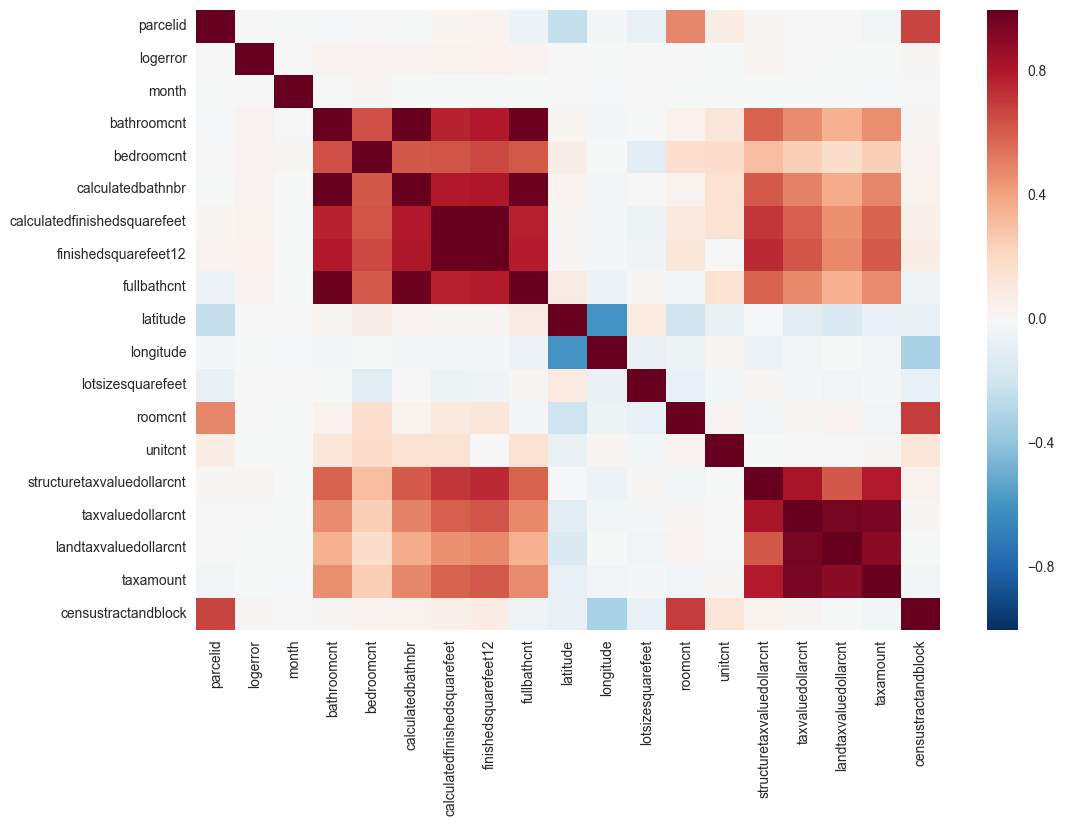

In [76]:
#Identify numerical columns to produce a heatmap
catcols = ['airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','hashottuborspa','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','taxdelinquencyflag']
numcols = [x for x in data_2016.columns if x not in catcols]

#Lets start by plotting a heatmap to determine if any variables are correlated
plt.figure(figsize = (12,8))
sns.heatmap(data=data_2016[numcols].corr())
plt.show()
plt.gcf().clear()

## Dealing with the 'fips' column

In [42]:
data_2016['fips'].unique()

array([ 6037.,  6059.,  6111.])

In [41]:
data_2017['fips'].unique()

array([ 6059.,  6111.,  6037.,    nan])

In [51]:
# from mpl_toolkits.basemap import Basemap, cm
# geocolumns = [  'latitude', 'longitude','propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc','regionidcity','regionidcounty', 'regionidzip','censustractandblock', 'rawcensustractandblock']

# geoprop = data_2016[geocolumns]
# #del data_2016; gc.collect()

# geoprop.loc[:,'latitude'] = geoprop.loc[:,'latitude']/1e6
# geoprop.loc[:,'longitude'] = geoprop.loc[:,'longitude']/1e6

# maxlat = (geoprop['latitude']).max()
# maxlon = (geoprop['longitude']).max()
# minlat = (geoprop['latitude']).min()
# minlon = (geoprop['longitude']).min()
# print('maxlat {} minlat {} maxlon {} minlon {}'.format(maxlat, minlat, maxlon, minlon))

# CAparms = { 'llcrnrlat' : minlat,
#                      'urcrnrlat' : maxlat+0.2,
#                      'llcrnrlon' : maxlon-2.5,
#                      'urcrnrlon' :minlon+2.5 }
# Bm, fig = create_basemap()
# x,y = Bm( geoprop['longitude'].values, geoprop['latitude'].values)                           
# Bm.scatter( x, y, marker = 'D',color = 'm', s = 1 )
# plt.show()

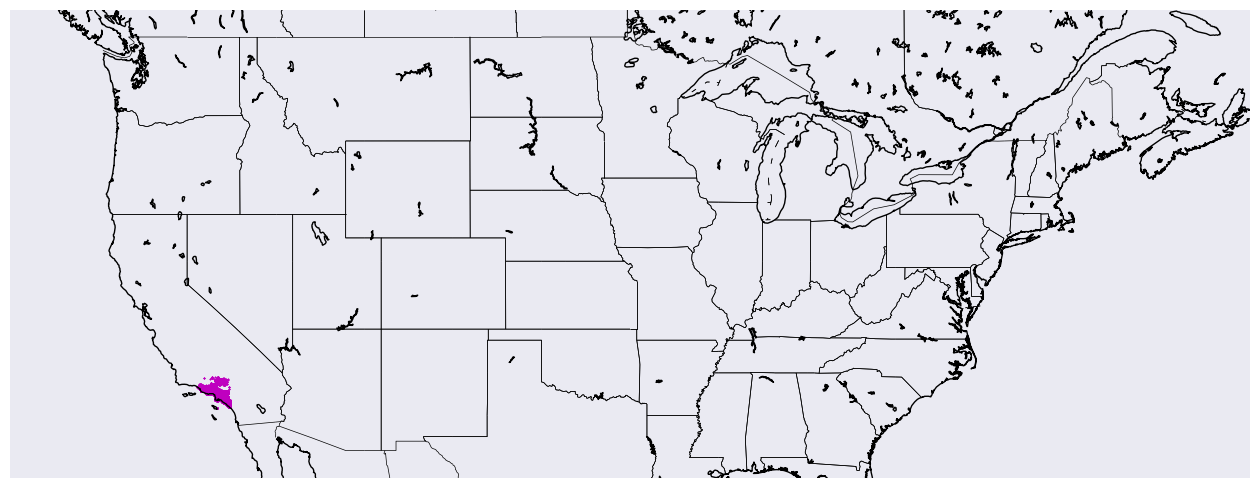

In [52]:
from mpl_toolkits.basemap import Basemap, cm
def create_basemap( llcrnrlat=30,urcrnrlat=50,llcrnrlon=-130,urcrnrlon=-60, figsize=(16,9) ):
    fig=plt.figure( figsize = figsize )
    Bm = Basemap( projection='merc', 
                llcrnrlat=llcrnrlat,urcrnrlat=urcrnrlat,
                llcrnrlon=llcrnrlon,urcrnrlon=urcrnrlon,
                lat_ts=20,resolution='i' )
    # draw coastlines, state and country boundaries, edge of map.
    Bm.drawcoastlines(); Bm.drawstates(); Bm.drawcountries() 
    return Bm, fig    


Bm, fig = create_basemap()
x,y = Bm( geoprop['longitude'].values, geoprop['latitude'].values)                           
Bm.scatter( x, y, marker = 'D',color = 'm', s = 1 )
plt.show()

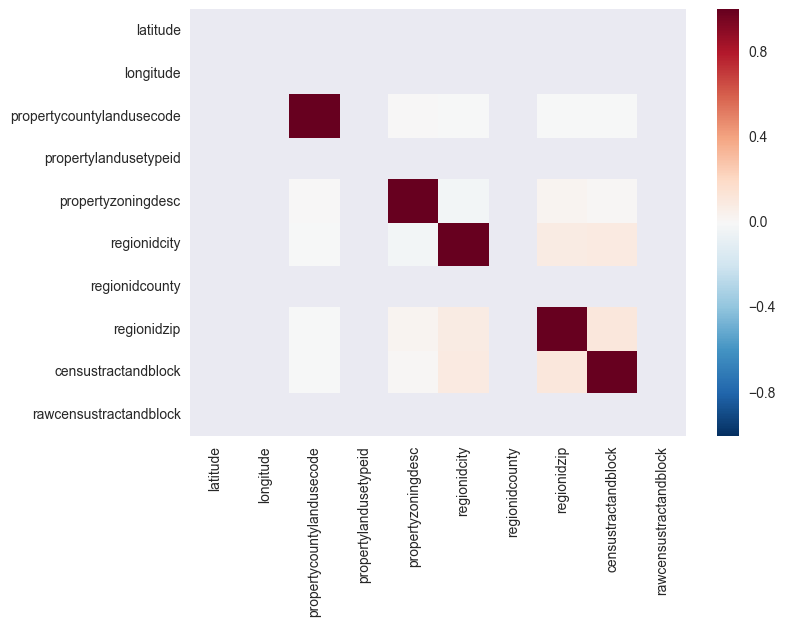

In [59]:
corr = geoprop.isnull().corr()
sns.heatmap( corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values ) 
plt.show()

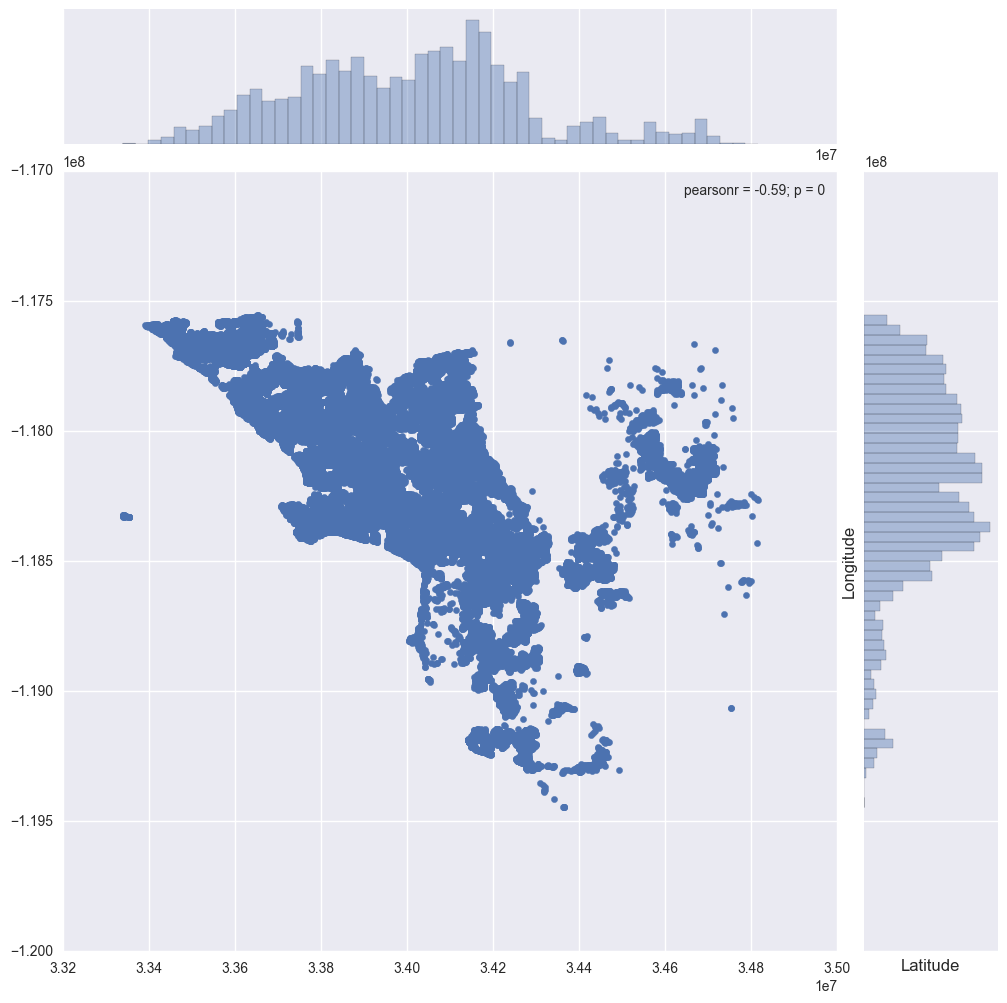

In [60]:
plt.figure(figsize=(12,12))
sns.jointplot(x=data_2016.latitude.values, y=data_2016.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

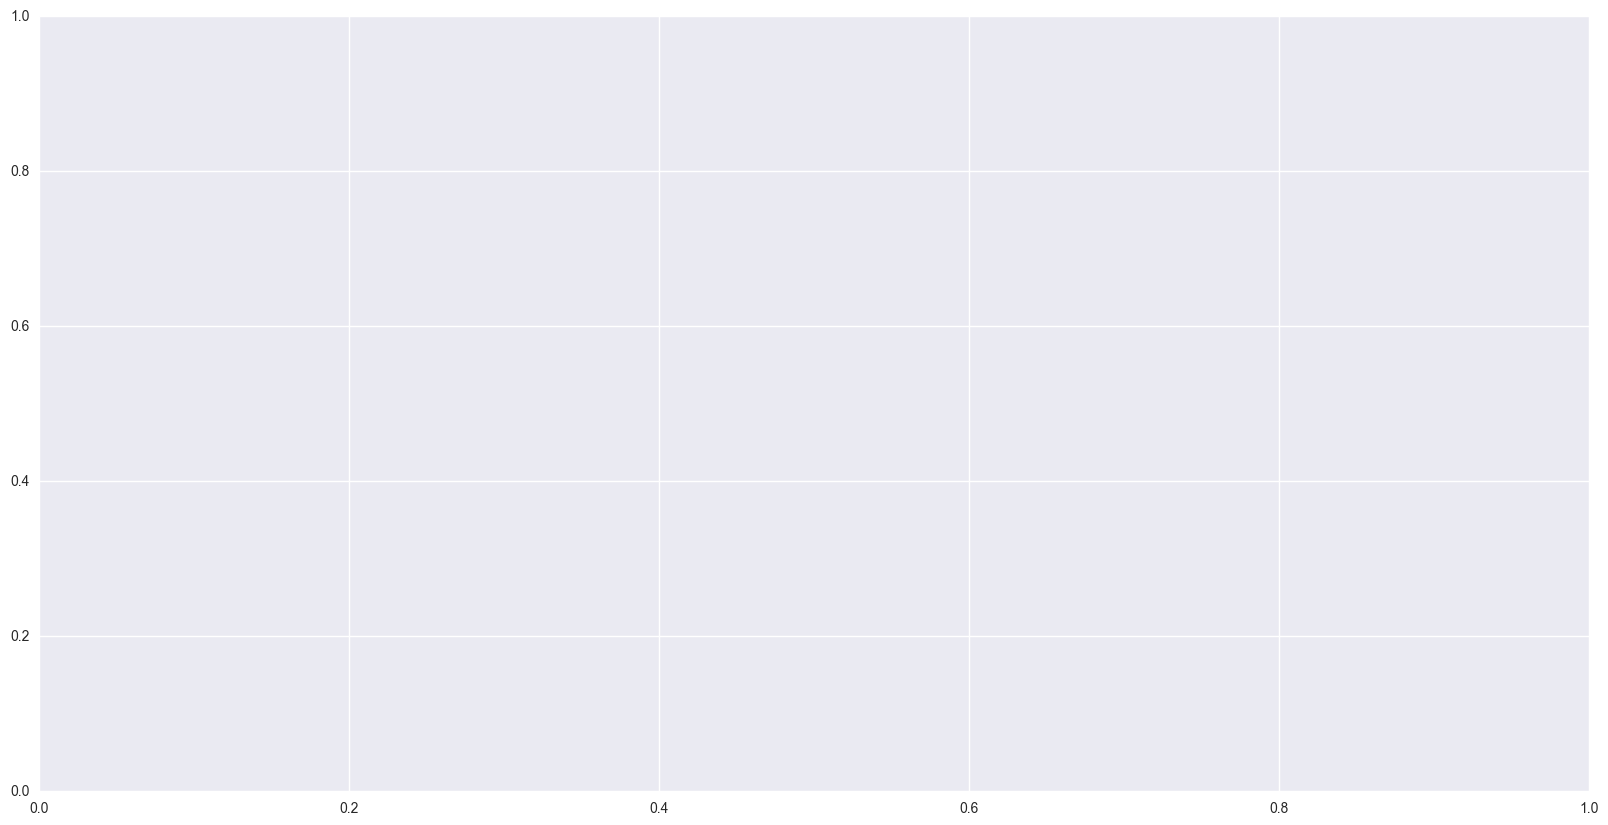

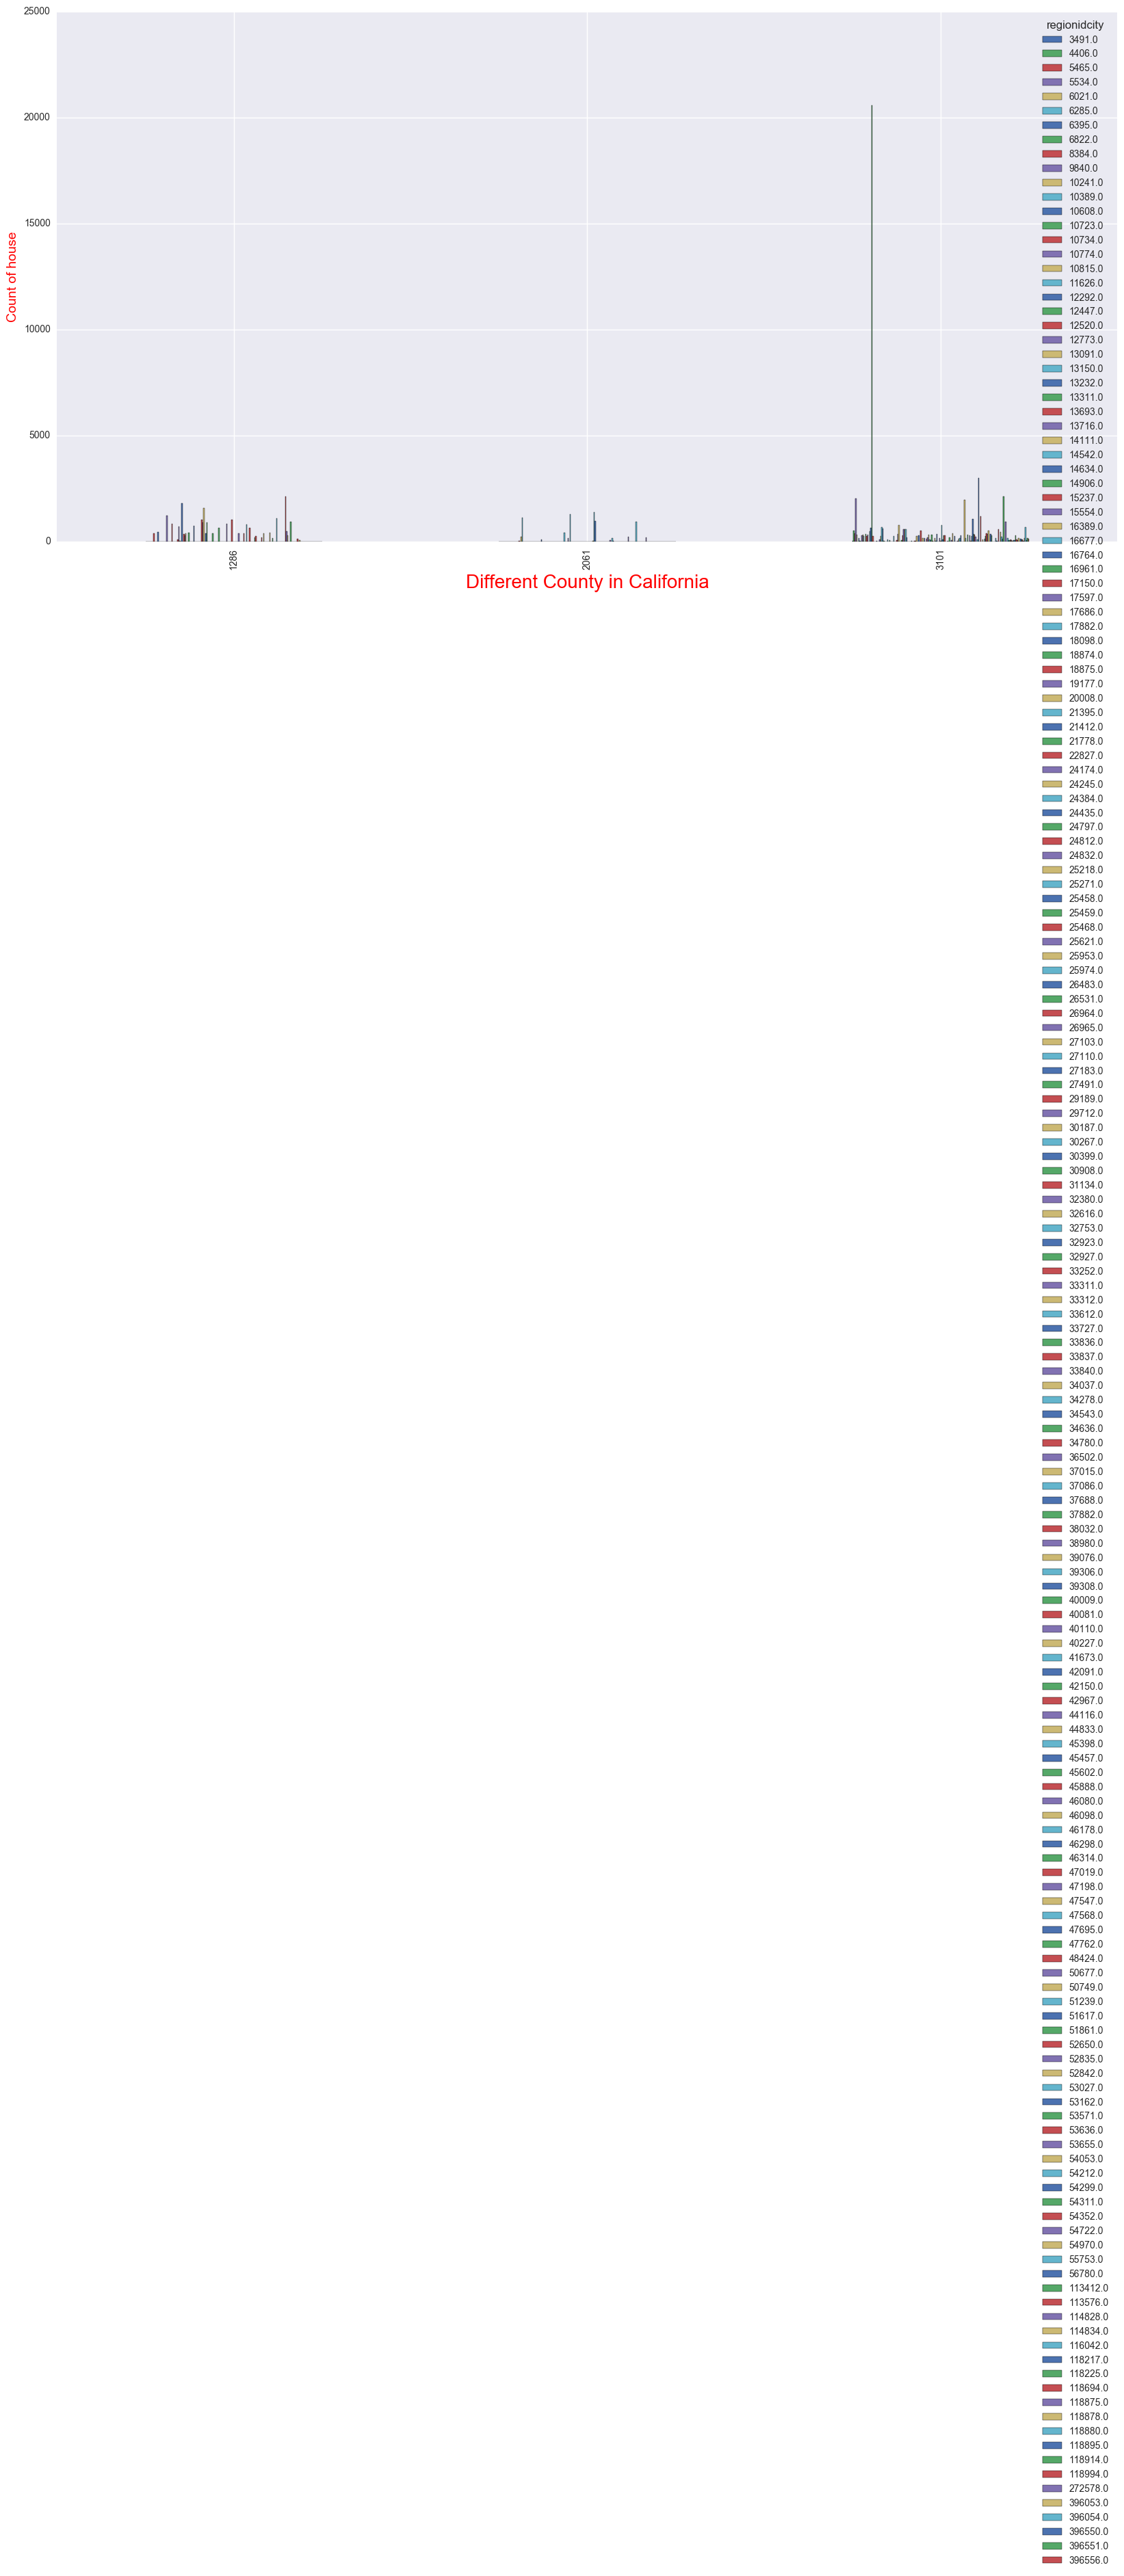

In [56]:
fig,ax1= plt.subplots()
fig.set_size_inches(20,10)
data_2016["regionidcounty"] = data_2016["regionidcounty"].map(lambda x:str(x).split(".")[0])
yearMerged = data_2016.groupby(['regionidcounty', 'regionidcity'])["parcelid"].count().unstack('regionidcity').fillna(0)
yearMerged.plot(kind='bar', stacked=False,ax=ax1)

ax1.set_xlabel('Different County in California',fontsize=20, color='red')
ax1.set_ylabel('Count of house',fontsize=14, color='red')


plt.show()

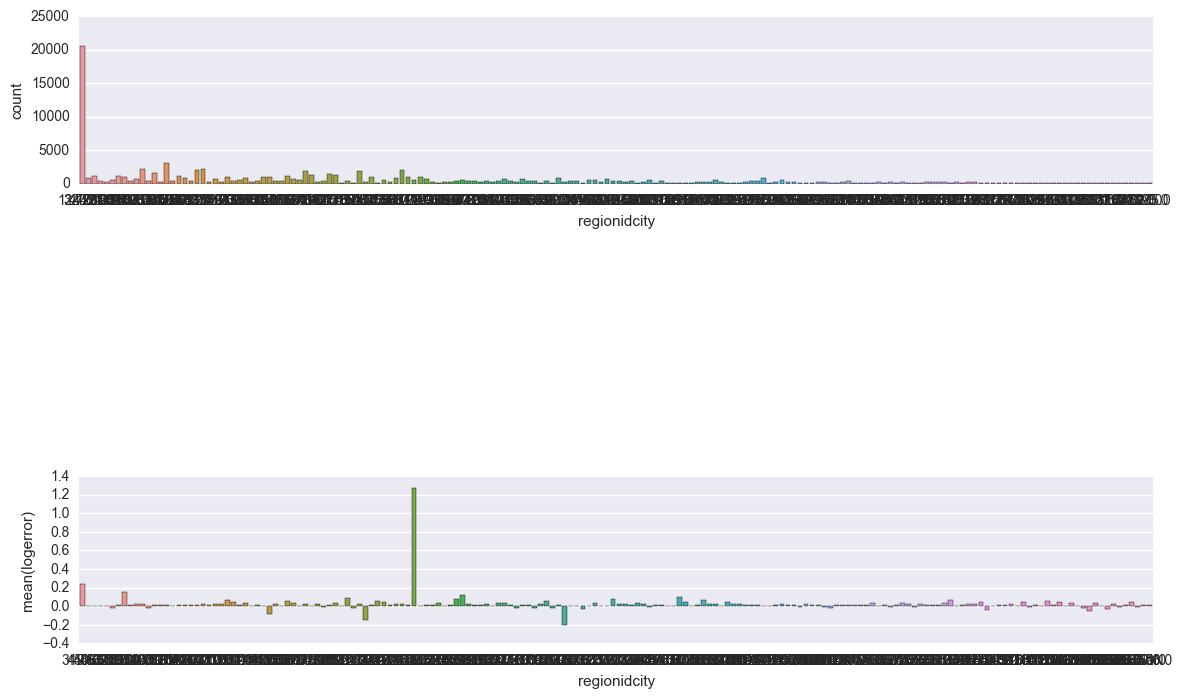

In [54]:
feature = 'regionidcity'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes3 = fig.add_subplot(413) #axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413)#; axes4 = fig.add_subplot(414); 
sns.countplot(data_2016[feature].fillna('NaN'), ax=axes1); 
#sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = data_2016[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
#bar_df2 = data_2016[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
#sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);

fig.tight_layout()
plt.show()

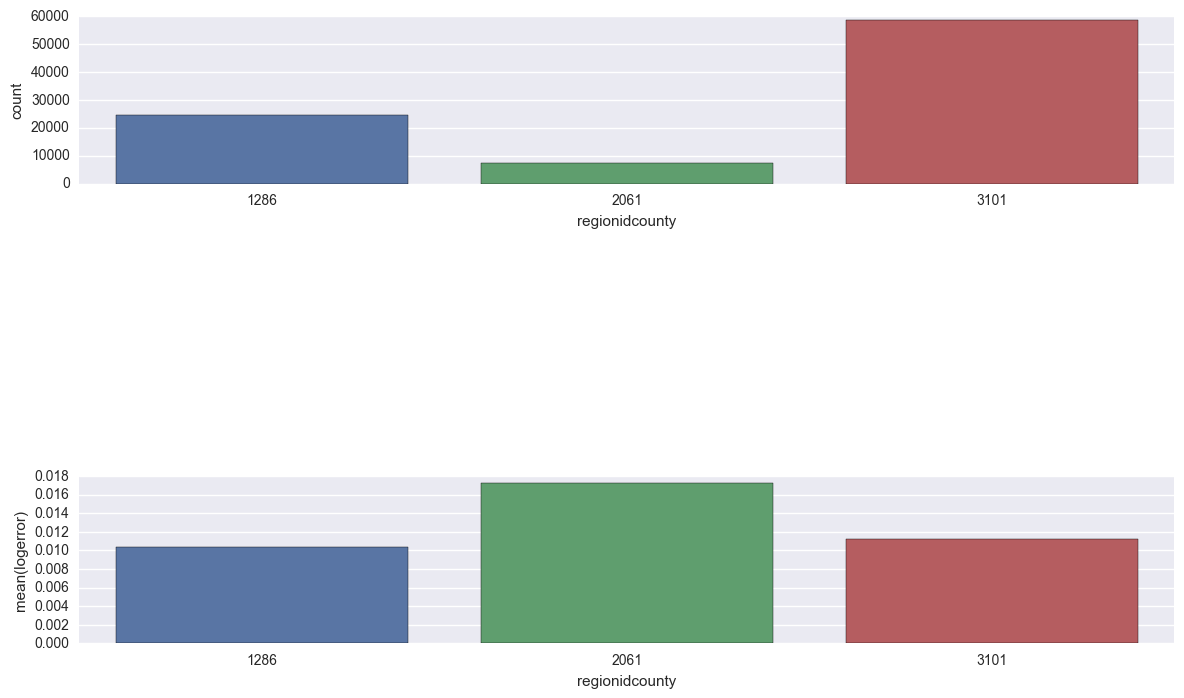

In [65]:
feature = 'regionidcounty'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes3 = fig.add_subplot(413)#axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(data_2016[feature].fillna('NaN'), ax=axes1); #sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = data_2016[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
#bar_df2 = data_2016[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
#sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()
plt.show()

## UnitCnt Column

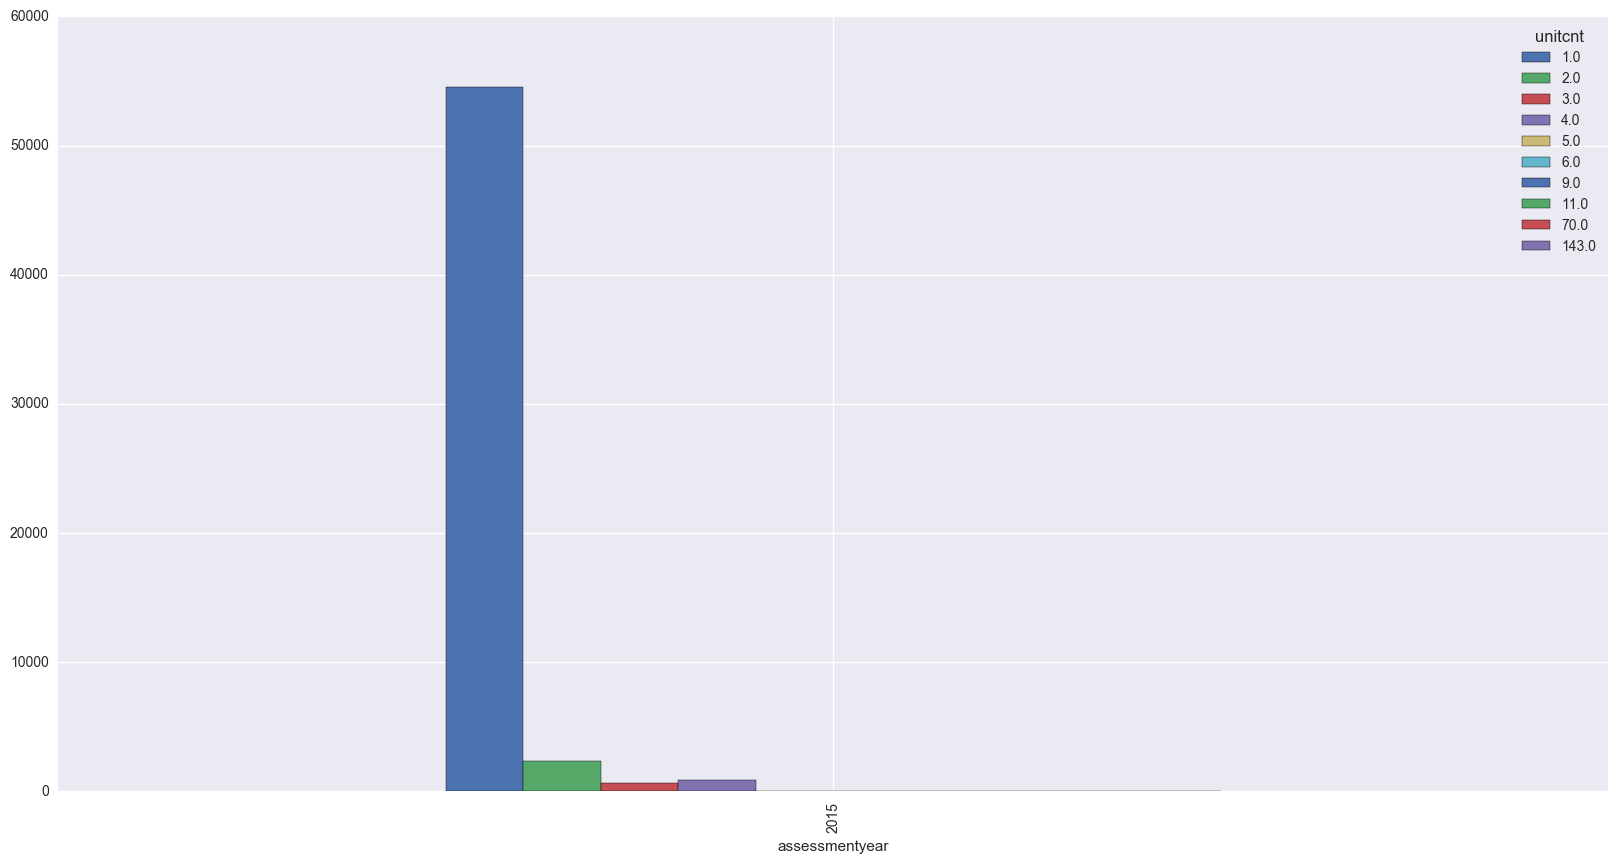

In [66]:
fig,ax1= plt.subplots()
fig.set_size_inches(20,10)
data_2016["assessmentyear"] = data_2016["assessmentyear"].map(lambda x:str(x).split(".")[0])
yearMerged = data_2016.groupby(['assessmentyear', 'unitcnt'])["parcelid"].count().unstack('unitcnt').fillna(0)
yearMerged.plot(kind='bar', stacked=False,ax=ax1)
plt.show()

## Transaction every month

### 2016

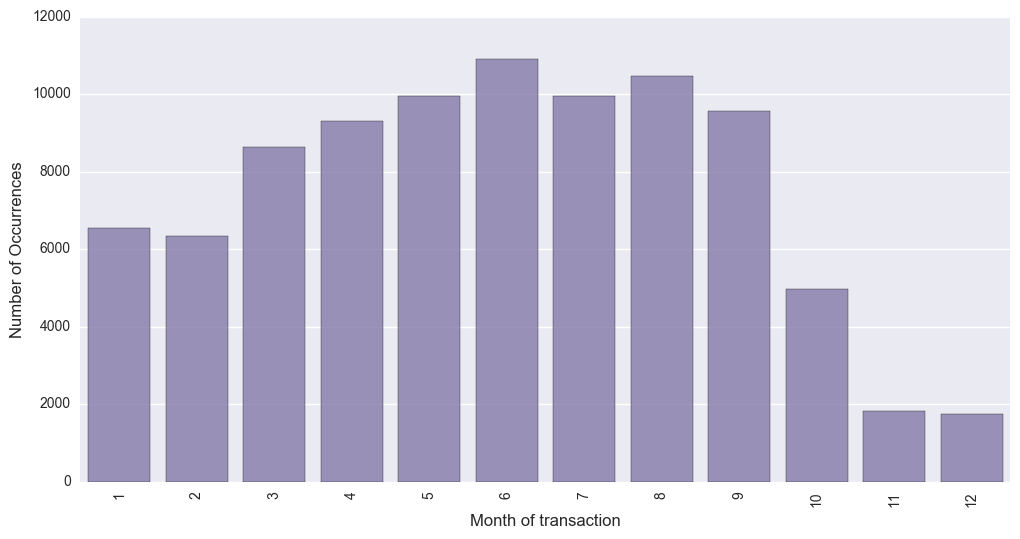

In [70]:
cnt_srs = trans_2016['month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

### 2017

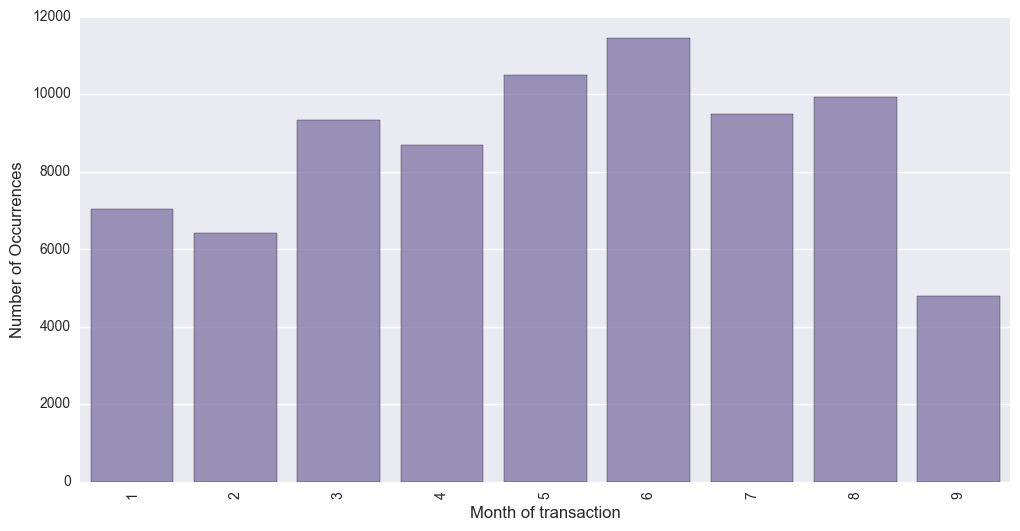

In [71]:
cnt_srs = trans_2017['month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [80]:
data_2016.columns

Index(['parcelid', 'logerror', 'transactiondate', 'year', 'month',
       'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock'],
      dtype='object')